In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

df_1 = pd.read_csv("forecasts\weather_data_forecast_1day.csv")
df_2 = pd.read_csv("forecasts\weather_data_forecast_2day.csv")
df_3 = pd.read_csv("forecasts\weather_data_forecast_3day.csv")
df_4 = pd.read_csv("forecasts\weather_data_forecast_4day.csv")
df_5 = pd.read_csv("forecasts\weather_data_forecast_5day.csv")

In [2]:
# Ajouter un suffixe aux colonnes pour les distinguer
df_1 = df_1.add_suffix('_jour1')
df_2 = df_2.add_suffix('_jour2')
df_3 = df_3.add_suffix('_jour3')
df_4 = df_4.add_suffix('_jour4')
df_5 = df_5.add_suffix('_jour5')

# Combiner les fichiers en un seul DataFrame
all_data = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=1)


In [3]:
# Supprimer les colonnes "Ville" "Latitude" et "Longitude", "Date", "Run_Date" des jours 2 à 5
all_data.drop(columns=['Ville_jour2', 'Latitude_jour2', 'Longitude_jour2', 'Date_jour2', 'Run_Date_jour2',
                       'Ville_jour3', 'Latitude_jour3', 'Longitude_jour3', 'Date_jour3', 'Run_Date_jour3',
                       'Ville_jour4', 'Latitude_jour4', 'Longitude_jour4', 'Date_jour4', 'Run_Date_jour4',
                       'Ville_jour5', 'Latitude_jour5', 'Longitude_jour5', 'Date_jour5', 'Run_Date_jour5'], inplace=True)

all_data.shape

(26000, 40)

c:\Users\j-bal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


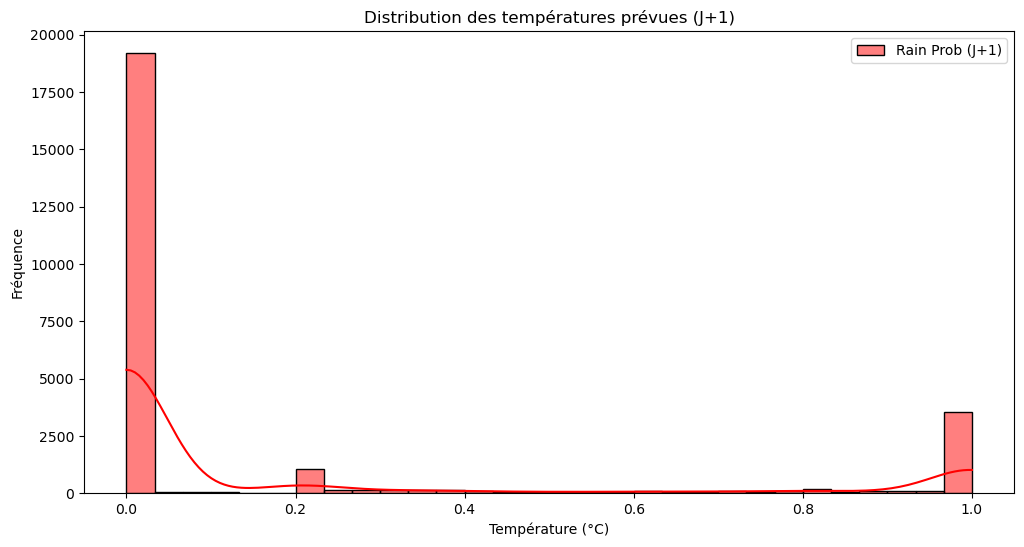

In [4]:
# Visualisation des températures
plt.figure(figsize=(12, 6))
sns.histplot(all_data["Rain_Probability_jour1"], bins=30, kde=True, color="red", label="Rain Prob (J+1)")
plt.xlabel("Température (°C)")
plt.ylabel("Fréquence")
plt.title("Distribution des températures prévues (J+1)")
plt.legend()
plt.show()

In [5]:
# Créer une colonne "Size" pour la taille des points basée sur Temp_Avg
all_data["Size"] = (all_data["Rain_Probability_jour1"] - all_data["Rain_Probability_jour1"].min()) / \
                    (all_data["Rain_Probability_jour1"].max() - all_data["Rain_Probability_jour1"].min()) * 30 + 10

# Création de la carte interactive
fig = px.scatter_mapbox(
    all_data, 
    lat="Latitude_jour1", 
    lon="Longitude_jour1", 
    color="Rain_Probability_jour1", 
    size="Size",  # Taille des points variable
    color_continuous_scale="plasma",  
    hover_name="Ville_jour1",  
    mapbox_style="open-street-map",  
    zoom=3.5,  
    title="Carte Météo : Probabilitée de pluie (J+1)"
)

# Affichage de la carte
fig.show()

In [6]:
# Définir les bornes de température
min_RainProb = all_data["Rain_Probability_jour1"].min()
max_RainProb = all_data["Rain_Probability_jour1"].max()

fig = px.density_mapbox(
    all_data,
    lat="Latitude_jour1",
    lon="Longitude_jour1",
    z="Rain_Probability_jour1",  # Influence des données de Temp_Avg
    mapbox_style="open-street-map",
    animation_frame="Date_jour1",  # Animation basée sur la date
    zoom=3.5,
    radius=7,
    color_continuous_scale="thermal",
    center={"lat": 46.603354, "lon": 1.888334},
    range_color=[min_RainProb, max_RainProb]  # Échelle de couleur fixe
)

fig.show()

c:\Users\j-bal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



City with the Highest Rain Probability (Sum)
City : Biarritz
Total Rain Probability : 159.06

 **Top 5 Cities with the Highest Rain Probability** 
   Ville_jour1  Rain_Probability_jour1
10    Biarritz                  159.06
8      Bayonne                  153.45
23    Le Havre                  149.27
13       Brest                  148.42
44  Saint-Malo                  138.55


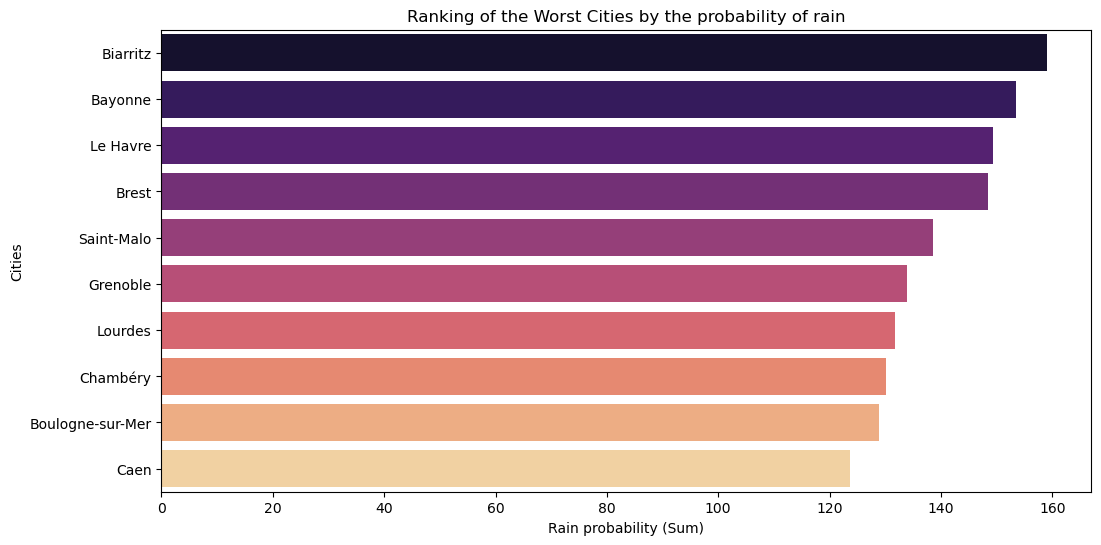

In [7]:
# Calculer le score total pour chaque ville pour le jour 1
city_ranking = all_data.groupby("Ville_jour1")["Rain_Probability_jour1"].sum().reset_index()
    
# Trier les villes par meilleur score
city_ranking = city_ranking.sort_values(by="Rain_Probability_jour1", ascending=False)

# Trouver la ville avec le meilleur score
best_city = city_ranking.iloc[0]

# Afficher les résultats
print("City with the Highest Rain Probability (Sum)")
print(f"City : {best_city['Ville_jour1']}")
print(f"Total Rain Probability : {best_city['Rain_Probability_jour1']}")

print("\n **Top 5 Cities with the Highest Rain Probability** ")
print(city_ranking.head(5))

# Visualisation du classement en barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Rain_Probability_jour1", 
    y="Ville_jour1", 
    data=city_ranking.head(10), 
    palette="magma"
)
plt.xlabel("Rain probability (Sum)")
plt.ylabel("Cities")
plt.title("Ranking of the Worst Cities by the probability of rain")
plt.show()


City with the Lowest Rain Probability (Sum)
City : Arles
Total Rain Probability : 45.76

 **Top 5 Cities with the Lowest Rain Probability** 
        Ville_jour1  Rain_Probability_jour1
6             Arles                   45.76
7           Avignon                   48.69
0   Aix-en-Provence                   49.40
35            Nîmes                   50.74
31      Montpellier                   51.13


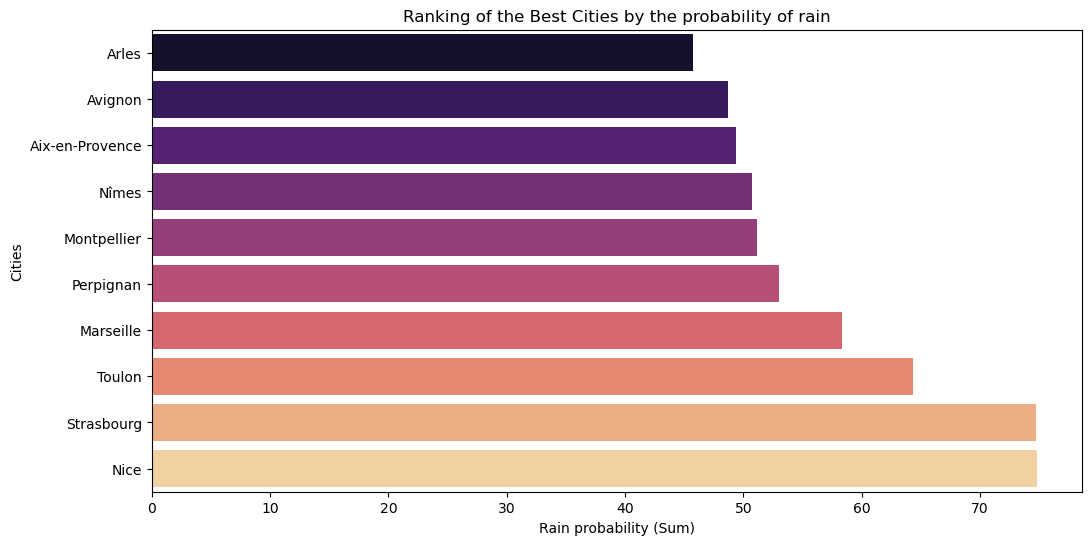

In [8]:
# Calculer le score total pour chaque ville pour le jour 1
city_ranking = all_data.groupby("Ville_jour1")["Rain_Probability_jour1"].sum().reset_index()
    
# Trier les villes par meilleur score
city_ranking = city_ranking.sort_values(by="Rain_Probability_jour1", ascending=True)

# Trouver la ville avec le meilleur score
best_city = city_ranking.iloc[0]

# Afficher les résultats
print("City with the Lowest Rain Probability (Sum)")
print(f"City : {best_city['Ville_jour1']}")
print(f"Total Rain Probability : {best_city['Rain_Probability_jour1']}")

print("\n **Top 5 Cities with the Lowest Rain Probability** ")
print(city_ranking.head(5))

# Visualisation du classement en barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Rain_Probability_jour1", 
    y="Ville_jour1", 
    data=city_ranking.head(10), 
    palette="magma"
)
plt.xlabel("Rain probability (Sum)")
plt.ylabel("Cities")
plt.title("Ranking of the Best Cities by the probability of rain")
plt.show()


In [9]:
# Vérifier si les colonnes existent
if all(col in all_data.columns for col in ["Rain_Probability_jour1", "Latitude_jour1", "Longitude_jour1"]):
    
    # Calculer le score total pour chaque ville pour le jour 1
    city_ranking = all_data.groupby("Ville_jour1", as_index=False).agg({
        "Rain_Probability_jour1": "sum",
        "Latitude_jour1": "first",
        "Longitude_jour1": "first"
    })
    
    # Trier les villes par meilleur score
    city_ranking = city_ranking.sort_values(by="Rain_Probability_jour1", ascending=False)

    # Sélectionner les 5 meilleures et les 5 pires villes
    top_5_cities = city_ranking.head(5)
    worst_5_cities = city_ranking.tail(5)

    # Afficher le tableau
    display(pd.concat([top_5_cities, worst_5_cities]))

else:
    print("Certaines colonnes nécessaires n'existent pas dans le DataFrame.")


Ville_jour1  Rain_Probability_jour1  Latitude_jour1  Longitude_jour1
10         Biarritz                  159.06       43.483252        -1.559278
8           Bayonne                  153.45       43.494514        -1.473666
23         Le Havre                  149.27       49.493898         0.107973
13            Brest                  148.42       48.390528        -4.486009
44       Saint-Malo                  138.55       48.649518        -2.026041
31      Montpellier                   51.13       43.611242         3.876734
35            Nîmes                   50.74       43.837425         4.360069
0   Aix-en-Provence                   49.40       43.529842         5.447474
7           Avignon                   48.69       43.949249         4.805901
6             Arles                   45.76       43.677622         4.630965

In [10]:
# Vérifier si les colonnes existent
if all(col in all_data.columns for col in ["Rain_Probability_jour1", "Latitude_jour1", "Longitude_jour1"]):
    
    # Calculer le score total pour chaque ville pour le jour 1
    city_ranking = all_data.groupby("Ville_jour1", as_index=False).agg({
        "Rain_Probability_jour1": "sum",
        "Latitude_jour1": "first",
        "Longitude_jour1": "first"
    })
    
    # Trier les villes par meilleur score
    city_ranking = city_ranking.sort_values(by="Rain_Probability_jour1", ascending=False)

    # Sélectionner les 5 meilleures et les 5 pires villes
    top_10_cities = city_ranking.head(10).copy()
    worst_10_cities = city_ranking.tail(10).copy()

    # Ajouter une colonne pour différencier les catégories
    top_10_cities["Category"] = "High 10"
    worst_10_cities["Category"] = "Low 10"

    # Fusionner les deux catégories
    top_worst_cities = pd.concat([top_10_cities, worst_10_cities])

    # Appliquer une taille uniforme pour toutes les villes
    top_worst_cities["Size"] = 5  # Taille fixe pour tous les points

    # Définir une palette de couleurs : Rouge pour le Top 10, Bleu pour le Worst 10
    color_map = {"High 10": "blue", "Low 10": "red"}

    # Carte interactive des 5 meilleures et 5 pires villes
    fig = px.scatter_mapbox(
        top_worst_cities,
        lat="Latitude_jour1",
        lon="Longitude_jour1",
        color="Category",  
        size="Size",  
        hover_name="Ville_jour1",
        hover_data={"Rain_Probability_jour1": True},
        mapbox_style="open-street-map",
        zoom=3.5,
        color_discrete_map=color_map,
        size_max=10  
    )

    fig.show()

else:
    print("Certaines colonnes nécessaires n'existent pas dans le DataFrame.")


c:\Users\j-bal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



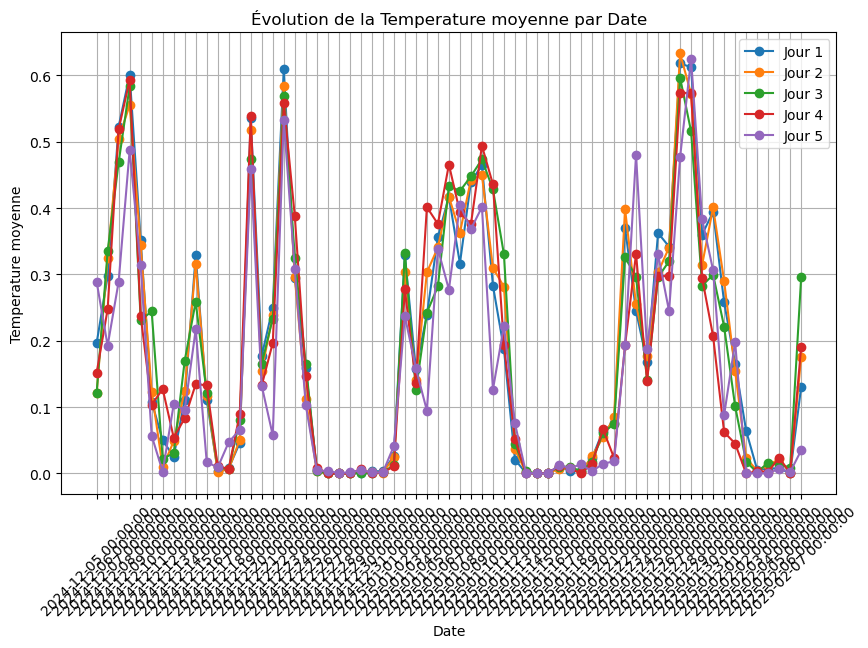

In [11]:
# Regrouper par date et pour chaque jour afficher la température moyenne
Rain_Probability_sum = all_data.groupby("Date_jour1")[
    ["Rain_Probability_jour1", "Rain_Probability_jour2", "Rain_Probability_jour3", "Rain_Probability_jour4", "Rain_Probability_jour5"]
].mean()

# Renommer les colonnes pour plus de clarté
Rain_Probability_sum.columns = ["Jour 1", "Jour 2", "Jour 3", "Jour 4", "Jour 5"]

# Tracer un line plot cumulés par date
plt.figure(figsize=(10, 6))
for column in Rain_Probability_sum.columns:
    plt.plot(Rain_Probability_sum.index, Rain_Probability_sum[column], marker="o", linestyle="-", label=column)

# Ajouter des labels et une légende
plt.xlabel("Date")
plt.ylabel("Temperature moyenne")
plt.title("Évolution de la Temperature moyenne par Date")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

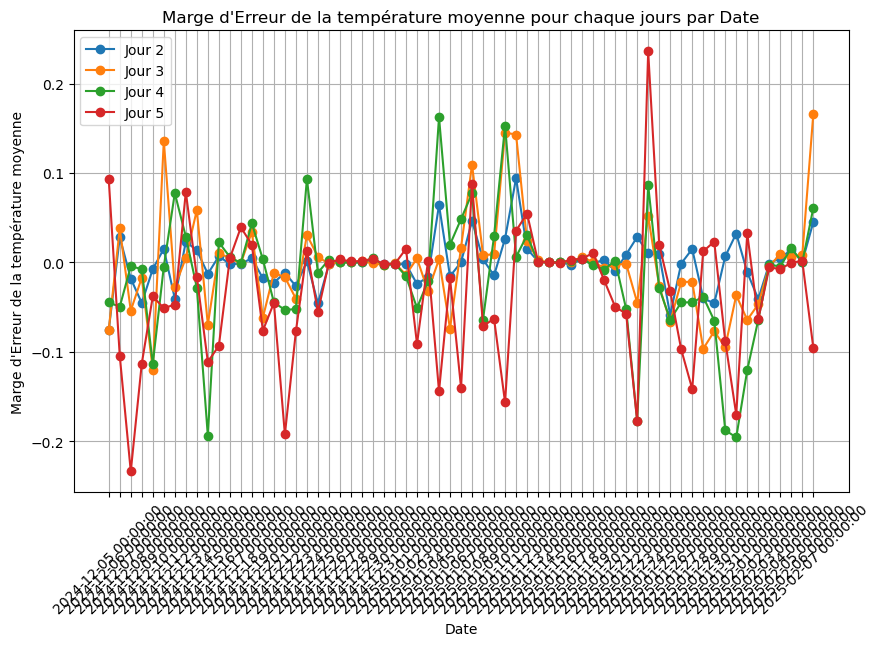

In [12]:
# Calculer la marge d'erreur entre les "weather_scores" "jour2" et "jour1"
Rain_Error_Margin1 = (Rain_Probability_sum["Jour 2"] - Rain_Probability_sum["Jour 1"])
Rain_Error_Margin2 = (Rain_Probability_sum["Jour 3"] - Rain_Probability_sum["Jour 1"])
Rain_Error_Margin3 = (Rain_Probability_sum["Jour 4"] - Rain_Probability_sum["Jour 1"])
Rain_Error_Margin4 = (Rain_Probability_sum["Jour 5"] - Rain_Probability_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur Rain_Probability_jour1
plt.figure(figsize=(10, 6))
plt.plot(Rain_Error_Margin1.index, Rain_Error_Margin1, marker="o", linestyle="-")
plt.plot(Rain_Error_Margin2.index, Rain_Error_Margin2, marker="o", linestyle="-")
plt.plot(Rain_Error_Margin3.index, Rain_Error_Margin3, marker="o", linestyle="-")
plt.plot(Rain_Error_Margin4.index, Rain_Error_Margin4, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de la température moyenne")
plt.title("Marge d'Erreur de la température moyenne pour chaque jours par Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(["Jour 2", "Jour 3", "Jour 4", "Jour 5"])

# Afficher le graphique
plt.show()